In [1]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 411.5 MB 7.8 kB/s 
     |████████████████████████████████| 412.3 MB 28 kB/s 
     |████████████████████████████████| 240 kB 51.8 MB/s 
     |████████████████████████████████| 171 kB 42.8 MB/s 
     |████████████████████████████████| 3.8 MB 34.0 MB/s 
     |████████████████████████████████| 503 kB 70.1 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=5e61c145df2e0caa7da17fcd1cb762065e67429e2d1d70f3e92362bf6a487294
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting

In [109]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [110]:
pwd

'/content'

In [111]:
eth=pd.read_csv('Eth.csv')

In [112]:
eth.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [113]:
eth= eth[['Date','Open', 'High', 'Low','Price', 'Vol.']]

In [114]:
gitdata='https://raw.githubusercontent.com/nicknochnack/Reinforcement-Learning-for-Trading/main/data/gmedata.csv'

In [115]:
df = pd.read_csv(gitdata)

In [116]:
eth.head(2)

,Date,Open,High,Low,Price,Vol.
0,"Jul 03, 2022","1,066.60","1,083.98","1,041.82","1,052.29",739.91K
1,"Jul 02, 2022","1,059.05","1,077.66","1,029.03","1,066.60",865.06K


In [117]:
eth.columns =df.columns

In [118]:
eth.head(2)

,Date,Open,High,Low,Close,Volume
0,"Jul 03, 2022","1,066.60","1,083.98","1,041.82","1,052.29",739.91K
1,"Jul 02, 2022","1,059.05","1,077.66","1,029.03","1,066.60",865.06K


In [119]:
eth.shape

(1645, 6)

In [120]:
df2=eth.copy()

In [121]:
df2.head()

,Date,Open,High,Low,Close,Volume
0,"Jul 03, 2022","1,066.60","1,083.98","1,041.82","1,052.29",739.91K
1,"Jul 02, 2022","1,059.05","1,077.66","1,029.03","1,066.60",865.06K
2,"Jul 01, 2022","1,069.13","1,110.25","1,035.79","1,058.94",1.89M
3,"Jun 30, 2022","1,099.51","1,105.88","1,000.77","1,069.05",1.71M
4,"Jun 29, 2022","1,143.95","1,155.02","1,088.10","1,099.51",1.54M


In [122]:
df2.shape

(1645, 6)

In [16]:
df2.head(2)

,Date,Open,High,Low,Close,Volume
0,"Jul 03, 2022","1,066.60","1,083.98","1,041.82","1,052.29",739.91K
1,"Jul 02, 2022","1,059.05","1,077.66","1,029.03","1,066.60",865.06K


In [17]:
df
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1645 non-null   object
 1   Open    1645 non-null   object
 2   High    1645 non-null   object
 3   Low     1645 non-null   object
 4   Close   1645 non-null   object
 5   Volume  1645 non-null   object
dtypes: object(6)
memory usage: 77.2+ KB


In [18]:
df2.head(3)

,Date,Open,High,Low,Close,Volume
0,"Jul 03, 2022","1,066.60","1,083.98","1,041.82","1,052.29",739.91K
1,"Jul 02, 2022","1,059.05","1,077.66","1,029.03","1,066.60",865.06K
2,"Jul 01, 2022","1,069.13","1,110.25","1,035.79","1,058.94",1.89M


In [123]:
df2['Volume']=df2['Volume'].str.replace('M', '000')

In [124]:
df2['Volume']=df2['Volume'].str.replace('K', '')
df2['Volume']=df2['Volume'].str.replace('B', '00000')

In [125]:
df2['Volume']=df2['Volume'].str.replace('.', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [126]:
df2['Volume']=df2['Volume'].astype(int)

In [128]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2.dtypes

Date      datetime64[ns]
Open              object
High              object
Low               object
Close             object
Volume             int64
dtype: object

In [129]:
df2.set_index('Date', inplace=True)
df2.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-07-03,"1,066.60","1,083.98","1,041.82","1,052.29",73991
2022-07-02,"1,059.05","1,077.66","1,029.03","1,066.60",86506
2022-07-01,"1,069.13","1,110.25","1,035.79","1,058.94",189000
2022-06-30,"1,099.51","1,105.88","1,000.77","1,069.05",171000
2022-06-29,"1,143.95","1,155.02","1,088.10","1,099.51",154000


In [130]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1645 entries, 2022-07-03 to 2018-01-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    1645 non-null   object
 1   High    1645 non-null   object
 2   Low     1645 non-null   object
 3   Close   1645 non-null   object
 4   Volume  1645 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 77.1+ KB


In [131]:
for col in df2.columns[:-1]:
  df2[col]= df2[col].str.replace(',', '').str.replace('.', '').astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [132]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1645 entries, 2022-07-03 to 2018-01-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Open    1645 non-null   int64
 1   High    1645 non-null   int64
 2   Low     1645 non-null   int64
 3   Close   1645 non-null   int64
 4   Volume  1645 non-null   int64
dtypes: int64(5)
memory usage: 77.1 KB


In [43]:
#df2['Open'].str.replace(',', '').str.replace('K', '').str.replace('.', '').astype(int)

In [133]:
df2.shape

(1645, 5)

In [134]:

env = gym.make('stocks-v0', df=df2, frame_bound=(100,1000), window_size=5)

In [135]:
env.signal_features

array([[338564,      0],
       [340189,   1625],
       [332938,  -7251],
       ...,
       [ 19110,   1050],
       [ 19264,    154],
       [ 18078,  -1186]])

In [136]:
df2.tail(3)

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-03,85878,95473,84000,94201,109000
2018-01-02,75246,89000,75246,85878,147000
2018-01-01,73677,76200,71794,75246,42546


In [137]:
env.shape,env.df

((5, 2),               Open    High     Low   Close  Volume
 Date                                              
 2022-07-03  106660  108398  104182  105229   73991
 2022-07-02  105905  107766  102903  106660   86506
 2022-07-01  106913  111025  103579  105894  189000
 2022-06-30  109951  110588  100077  106905  171000
 2022-06-29  114395  115502  108810  109951  154000
 ...            ...     ...     ...     ...     ...
 2018-01-05   93930  102360   93000   96277  104000
 2018-01-04   94201   99700   89324   94000  122000
 2018-01-03   85878   95473   84000   94201  109000
 2018-01-02   75246   89000   75246   85878  147000
 2018-01-01   73677   76200   71794   75246   42546
 
 [1645 rows x 5 columns])

In [138]:
env.action_space

Discrete(2)

In [139]:
env = gym.make('stocks-v0', df=df2, frame_bound=(100,1000), window_size=5)

info {'total_reward': 515.0, 'total_profit': 0.011361168480719086, 'position': 0}


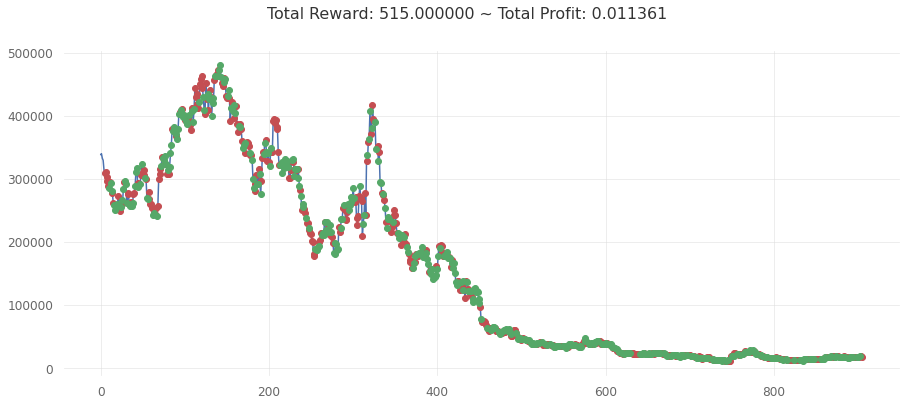

In [140]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [141]:
env

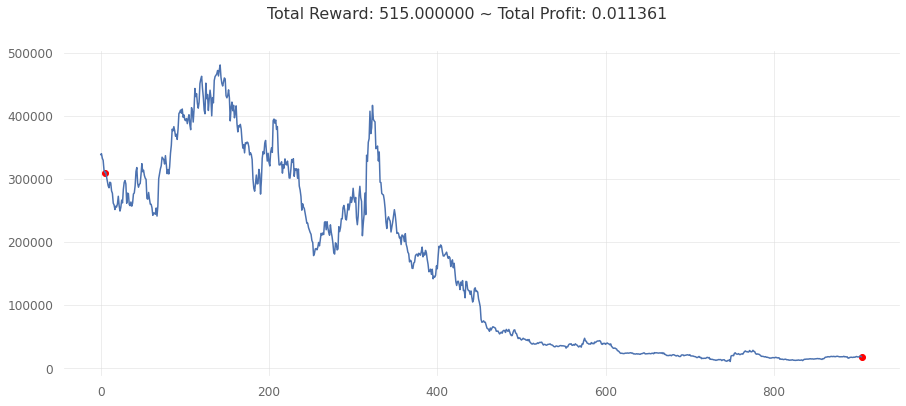

In [142]:
plt.figure(figsize=(15,6))
plt.cla()
env.render()
plt.show()

In [143]:
env.history.keys()

dict_keys(['total_reward', 'total_profit', 'position'])

In [144]:
len(env.history['total_reward'])

899

In [146]:
env.history['total_reward'][1:1000]

[0.0,
 0.0,
 0.0,
 0.0,
 8823.0,
 8823.0,
 8823.0,
 -7759.0,
 -7759.0,
 -7759.0,
 -7759.0,
 -7759.0,
 -10993.0,
 -10993.0,
 1051.0,
 1051.0,
 -7417.0,
 -7417.0,
 -7417.0,
 -142.0,
 -142.0,
 11081.0,
 11081.0,
 11081.0,
 11081.0,
 -8804.0,
 -8804.0,
 -8804.0,
 -8804.0,
 -4843.0,
 -4843.0,
 -4843.0,
 14551.0,
 14551.0,
 14551.0,
 14551.0,
 14551.0,
 18079.0,
 18079.0,
 22764.0,
 22764.0,
 37184.0,
 37184.0,
 24410.0,
 24410.0,
 24410.0,
 24410.0,
 22528.0,
 22528.0,
 22528.0,
 31964.0,
 31964.0,
 31964.0,
 31964.0,
 31964.0,
 31964.0,
 31964.0,
 35305.0,
 35305.0,
 35305.0,
 35305.0,
 51182.0,
 51182.0,
 51182.0,
 51182.0,
 51182.0,
 64906.0,
 64906.0,
 64906.0,
 55935.0,
 55935.0,
 55935.0,
 27389.0,
 27389.0,
 20361.0,
 20361.0,
 20361.0,
 20361.0,
 79782.0,
 79782.0,
 79782.0,
 79925.0,
 79925.0,
 79925.0,
 79925.0,
 79925.0,
 79925.0,
 115095.0,
 115095.0,
 115095.0,
 116795.0,
 116795.0,
 116795.0,
 112721.0,
 112721.0,
 116170.0,
 116170.0,
 124003.0,
 124003.0,
 108234.0,
 108234.

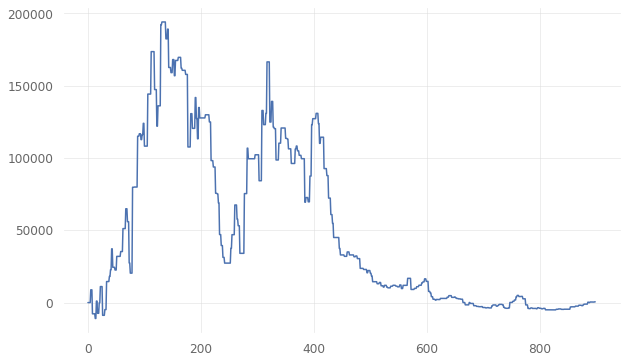

In [147]:
plt.plot(env.history['total_reward'])

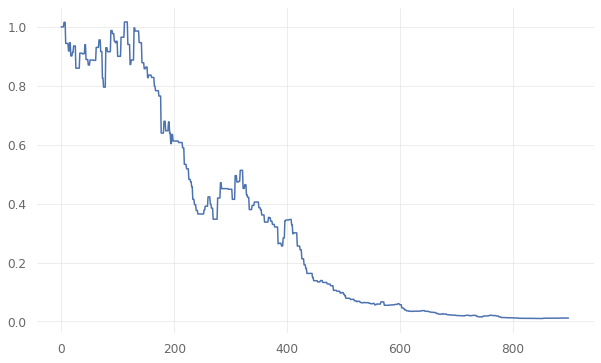

In [148]:
plt.plot(env.history['total_profit'])

In [149]:
df2.shape

(1645, 5)

In [150]:
env_maker = lambda: gym.make('stocks-v0', df=df2, frame_bound=(100,1000), window_size=5)
env = DummyVecEnv([env_maker])

In [151]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=10000)

---------------------------------
| explained_variance | 0.00011  |
| fps                | 17       |
| nupdates           | 1        |
| policy_entropy     | 0.692    |
| total_timesteps    | 5        |
| value_loss         | 5.89e+08 |
---------------------------------
----------------------------------
| explained_variance | -9.78e-06 |
| fps                | 321       |
| nupdates           | 100       |
| policy_entropy     | 0.691     |
| total_timesteps    | 500       |
| value_loss         | 1.3e+06   |
----------------------------------
---------------------------------
| explained_variance | 4.77e-06 |
| fps                | 363      |
| nupdates           | 200      |
| policy_entropy     | 0.691    |
| total_timesteps    | 1000     |
| value_loss         | 2.85e+06 |
---------------------------------
----------------------------------
| explained_variance | -4.05e-06 |
| fps                | 381       |
| nupdates           | 300       |
| policy_entropy     | 0.693     |
|

In [152]:
model.num_timesteps

10000

In [153]:
model.summary

<tf.Tensor 'Merge/MergeSummary:0' shape=() dtype=string>

In [154]:
df2.shape

(1645, 5)

In [155]:
env = gym.make('stocks-v0', df=df2, frame_bound=(100,1000), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -311210.0, 'total_profit': 0.03621746442710669, 'position': 1}


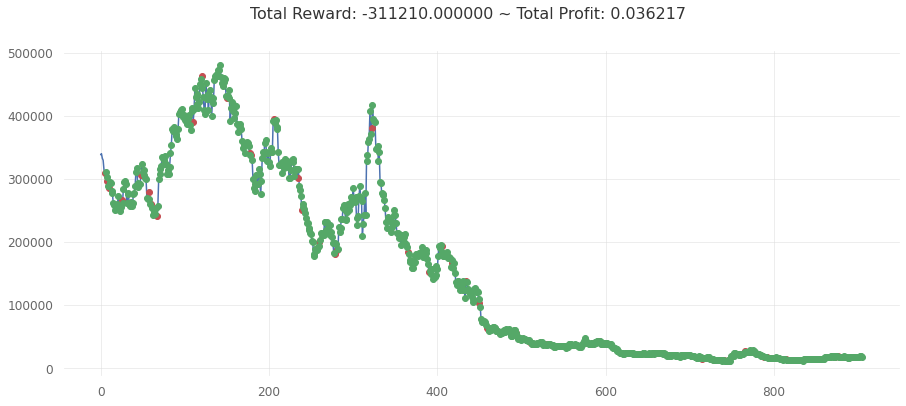

In [156]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

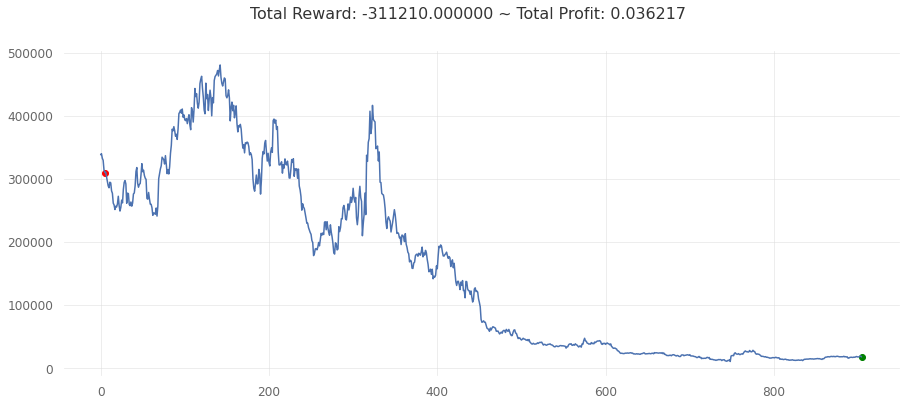

In [157]:
plt.figure(figsize=(15,6))
plt.cla()
env.render()
plt.show()

In [158]:
from stable_baselines import A2C
from stable_baselines.common.vec_env import DummyVecEnv

import matplotlib.pyplot as plt

In [70]:
!pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 142 kB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 31.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have f

In [159]:
import gym
import gym_anytrading
import quantstats as qs

In [72]:
df2.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-07-03,106660,108398,104182,105229,73991
2022-07-02,105905,107766,102903,106660,86506
2022-07-01,106913,111025,103579,105894,189000
2022-06-30,109951,110588,100077,106905,171000
2022-06-29,114395,115502,108810,109951,154000


In [162]:
policy_kwargs = dict(net_arch=[64, 'lstm', dict(vf=[128, 128, 128], pi=[64, 64])])
model = A2C('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)
model.learn(total_timesteps=1000)

Wrapping the env in a DummyVecEnv.
----------------------------------
| explained_variance | -6.32e-06 |
| fps                | 14        |
| nupdates           | 1         |
| policy_entropy     | 0.68      |
| total_timesteps    | 5         |
| value_loss         | 1.94e+08  |
----------------------------------
----------------------------------
| explained_variance | -4.89e-06 |
| fps                | 259       |
| nupdates           | 100       |
| policy_entropy     | 0.673     |
| total_timesteps    | 500       |
| value_loss         | 7.81e+06  |
----------------------------------
---------------------------------
| explained_variance | 2.98e-07 |
| fps                | 269      |
| nupdates           | 200      |
| policy_entropy     | 0.667    |
| total_timesteps    | 1000     |
| value_loss         | 2.55e+07 |
---------------------------------


In [163]:
env = env_maker()
observation = env.reset()

while True:
    observation = observation[np.newaxis, ...]

    # action = env.action_space.sample()
    action, _states = model.predict(observation)
    observation, reward, done, info = env.step(action)

    # env.render()
    if done:
        print("info:", info)
        break

info: {'total_reward': -243404.0, 'total_profit': 0.00442566771505299, 'position': 1}


In [83]:
env.shape

(5, 2)

In [84]:
env.observation_space

Box(-inf, inf, (5, 2), float64)

In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1645 entries, Jul 03, 2022 to Jan 01, 2018
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Open    1645 non-null   int64
 1   High    1645 non-null   int64
 2   Low     1645 non-null   int64
 3   Close   1645 non-null   int64
 4   Volume  1645 non-null   int64
dtypes: int64(5)
memory usage: 141.6+ KB


[Performance Metrics]

                           Strategy
-------------------------  ----------
Start Period               2022-03-23
End Period                 2019-10-08
Risk-Free Rate             0.0%
Time in Market             26.0%

Cumulative Return          -99.56%
CAGR﹪                     807.57%

Sharpe                     -1.86
Prob. Sharpe Ratio         0.86%
Smart Sharpe               -1.84
Sortino                    -2.85
Smart Sortino              -2.81
Sortino/√2                 -2.01
Smart Sortino/√2           -1.99
Omega                      0.47

Max Drawdown               -99.54%
Longest DD Days            -894
Volatility (ann.)          69.8%
Calmar                     8.11
Skew                       6.56
Kurtosis                   119.52

Expected Daily %           -0.6%
Expected Monthly %         -16.53%
Expected Yearly %          -74.21%
Kelly Criterion            -32.33%
Risk of Ruin               0.0%
Daily Value-at-Risk        -7.75%
Expected Shortfall (cVaR

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


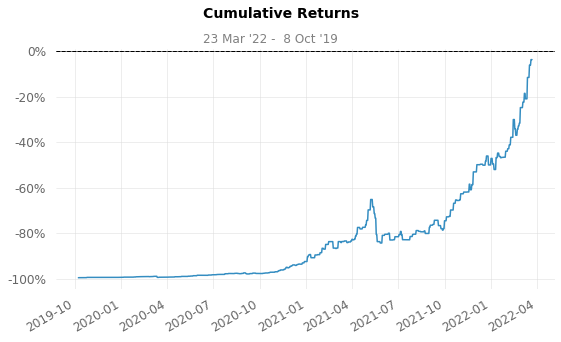

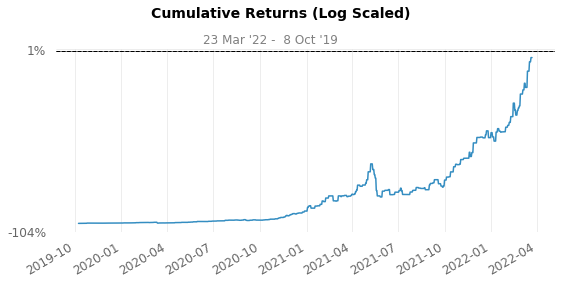

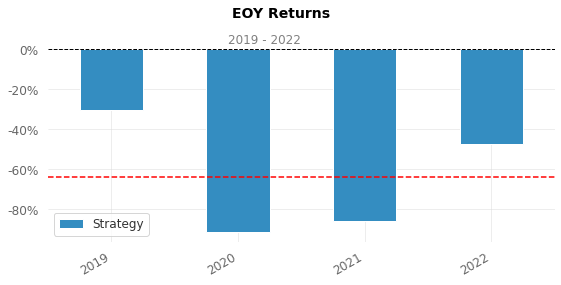

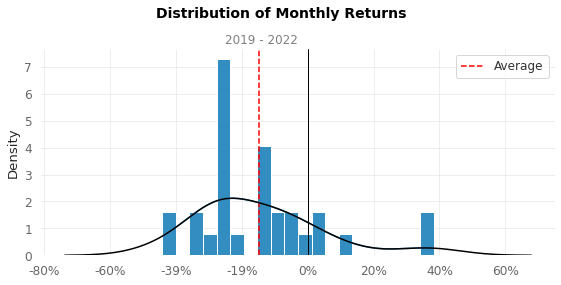

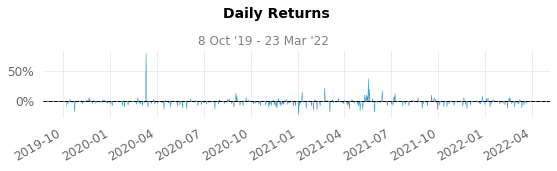

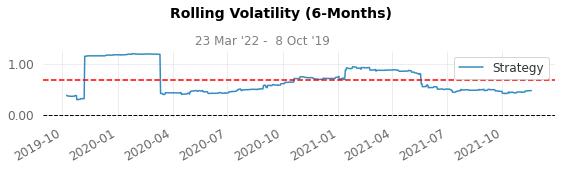

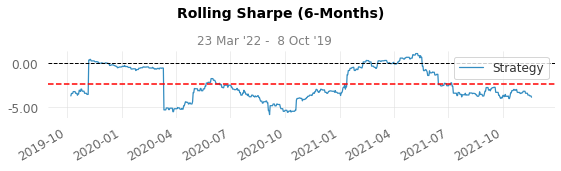

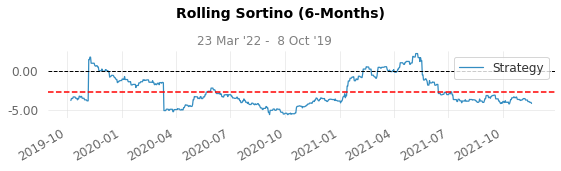

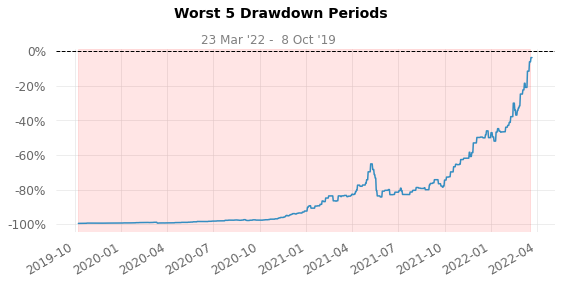

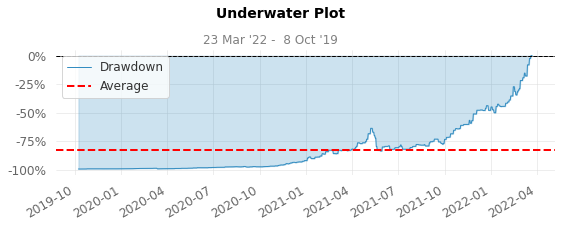

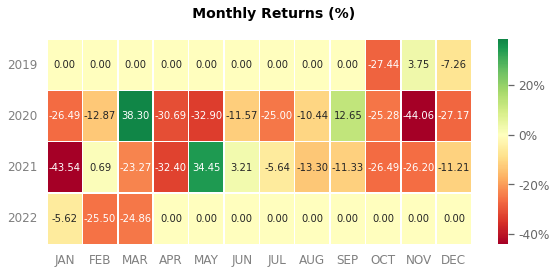

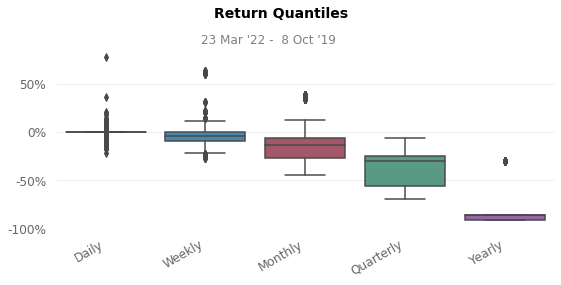

In [164]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=df2.index[100+1:1000])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='a2c_quantstats.html')

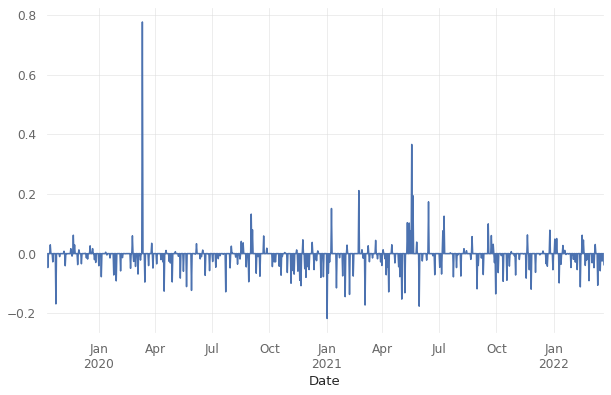

In [165]:
returns.plot()

In [166]:
returns.sum()

-4.634317761255293

[Performance Metrics]

                           Strategy
-------------------------  ----------
Start Period               2022-03-23
End Period                 2019-10-08
Risk-Free Rate             0.0%
Time in Market             26.0%

Cumulative Return          -99.56%
CAGR﹪                     807.57%

Sharpe                     -1.86
Prob. Sharpe Ratio         0.86%
Smart Sharpe               -1.84
Sortino                    -2.85
Smart Sortino              -2.81
Sortino/√2                 -2.01
Smart Sortino/√2           -1.99
Omega                      0.47

Max Drawdown               -99.54%
Longest DD Days            -894
Volatility (ann.)          69.8%
Calmar                     8.11
Skew                       6.56
Kurtosis                   119.52

Expected Daily %           -0.6%
Expected Monthly %         -16.53%
Expected Yearly %          -74.21%
Kelly Criterion            -32.33%
Risk of Ruin               0.0%
Daily Value-at-Risk        -7.75%
Expected Shortfall (cVaR

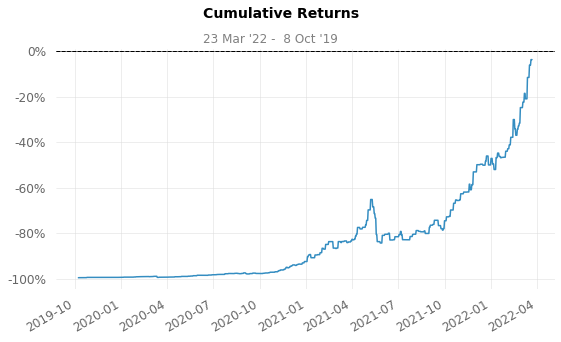

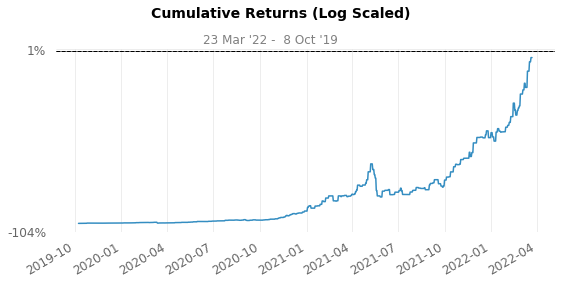

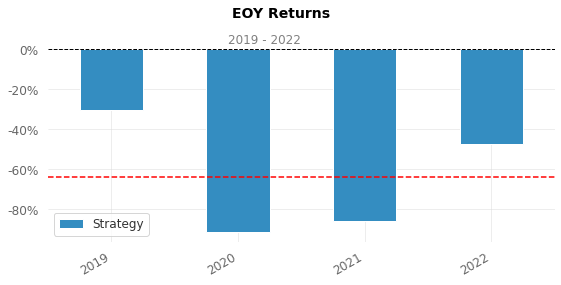

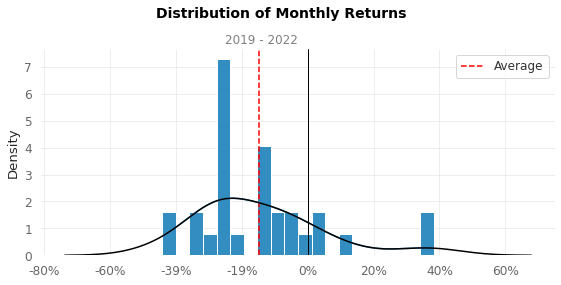

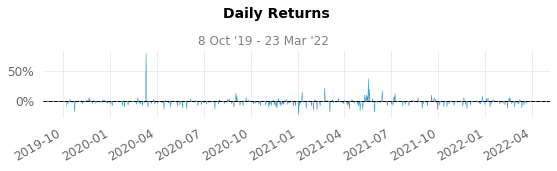

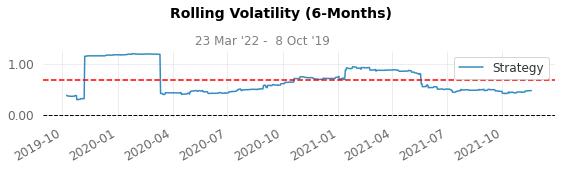

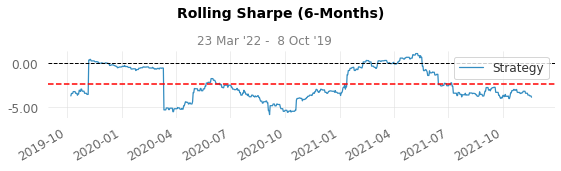

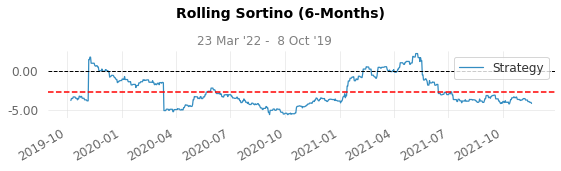

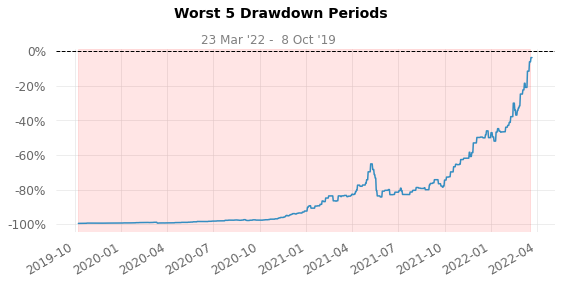

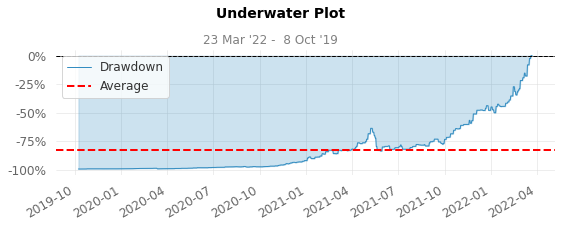

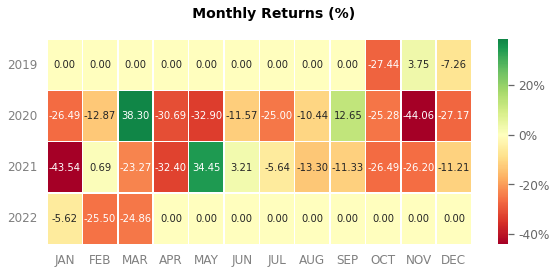

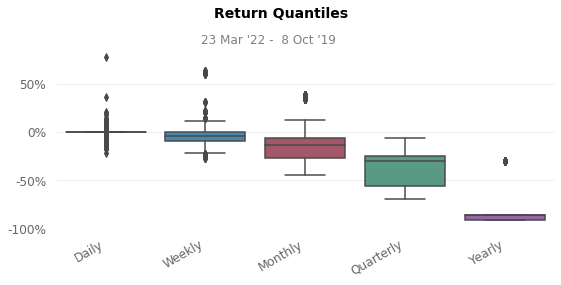

In [167]:
qs.reports.full(returns)

In [ ]:
#https://colab.research.google.com/drive/1RQAvnSCXqsu3JIiZN4lKBNlgX9zU7cJ6?usp=sharing